Assignment 3 Dementia in Patients with Medication

I decided to use data on Dementia because even though it doesn't really run in my family, it runs families that I know. Dementia is a terrible disease that affects the brain in older people and makes everyday activties a struggle. As a pyschology major, I am always interested in things about the brain and the causes of dementia is no different. This data looks at whether or not someone is diabetic, their weight, their age, smoking status and so much more. My hope is to predict whether someone may get dementia depending on each variable and how it applies to them. There is not currently a cure for dementia yet, but being able to predict and prepare for it could help out many families who may end up having a loved one with dementia in the furture.
Dataset 
https://www.kaggle.com/datasets/kaggler2412/dementia-patient-health-and-prescriptions-dataset

In [44]:
import pandas as pd #imports panda a common package used
import seaborn as sns #good for making graphs

In [45]:
# Read the CSV file
data = pd.read_csv("/Users/jamien/Documents/Dementia /Data/dementia_patients_health_data.csv")
#shows the beginning of the data
data.head()

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Prescription,Dosage in mg,Age,...,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,NaN,NaN,60,...,Current Smoker,Negative,Sedentary,No,10,No,Low-Carb Diet,Poor,Diabetes,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,Galantamine,12.0,61,...,Former Smoker,Positive,Moderate Activity,No,1,Yes,Low-Carb Diet,Poor,Heart Disease,1
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,NaN,NaN,69,...,Former Smoker,Negative,Moderate Activity,No,8,No,Mediterranean Diet,Poor,Heart Disease,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,Donepezil,23.0,78,...,Never Smoked,Negative,Mild Activity,Yes,5,Yes,Balanced Diet,Poor,Hypertension,1
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,Memantine,20.0,77,...,Never Smoked,Positive,Mild Activity,No,0,Yes,Low-Carb Diet,Good,Diabetes,1


In [46]:
#Give information about the data such as how many null there are and the types of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diabetic                   1000 non-null   int64  
 1   AlcoholLevel               1000 non-null   float64
 2   HeartRate                  1000 non-null   int64  
 3   BloodOxygenLevel           1000 non-null   float64
 4   BodyTemperature            1000 non-null   float64
 5   Weight                     1000 non-null   float64
 6   MRI_Delay                  1000 non-null   float64
 7   Prescription               485 non-null    object 
 8   Dosage in mg               485 non-null    float64
 9   Age                        1000 non-null   int64  
 10  Education_Level            1000 non-null   object 
 11  Dominant_Hand              1000 non-null   object 
 12  Gender                     1000 non-null   object 
 13  Family_History             1000 non-null   object

In [47]:
# Makes all column names lowercase
lowercase_columns = {col: col.lower() for col in data.columns}

# Rename columns 
data.rename(columns=lowercase_columns, inplace=True)


In [48]:
#shows the mean, min, standard deviation, and much more to describe the data
data.describe()

,diabetic,alcohollevel,heartrate,bloodoxygenlevel,bodytemperature,weight,mri_delay,dosage in mg,age,cognitive_test_scores,dementia
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,485.000000,1000.000000,1000.000000,1000.000000
mean,0.513000,0.098429,79.383000,95.226051,36.761513,74.321326,30.103568,9.213402,74.908000,6.383000,0.485000
std,0.500081,0.058715,12.107556,2.929262,0.431701,14.463765,16.862170,6.493188,9.095068,3.180633,0.500025
min,0.000000,0.000414,60.000000,90.010677,36.002108,50.069731,0.094684,1.500000,60.000000,0.000000,0.000000
25%,0.000000,0.045505,68.000000,92.875017,36.395363,61.387339,16.237371,4.000000,67.000000,4.000000,0.000000
50%,1.000000,0.098235,79.000000,95.390420,36.784319,74.149204,29.577194,8.000000,75.000000,8.000000,0.000000
75%,1.000000,0.151840,90.000000,97.785111,37.126655,87.024034,44.176723,12.000000,83.000000,9.000000,1.000000
max,1.000000,0.199866,100.000000,99.999230,37.496809,99.982722,59.957599,23.000000,90.000000,10.000000,1.000000


<Axes: >

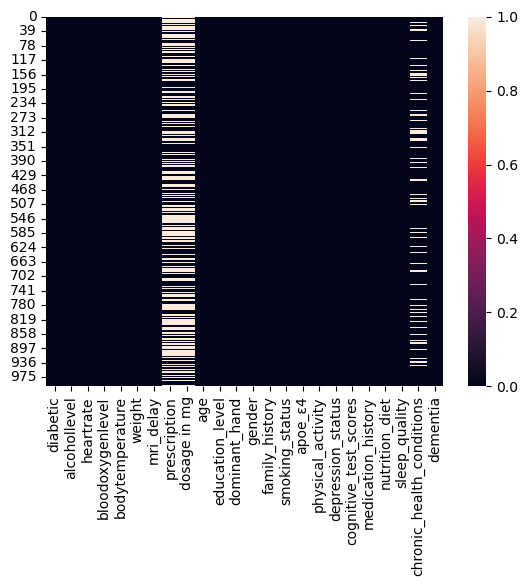

In [49]:
#creates a heat map to show all the missing values
sns.heatmap(data.isnull())

In [50]:
# Drop all columns with null values and columns that don't make sense
df_clean = data.dropna(axis=1)



print(df_clean)

     diabetic  alcohollevel  heartrate  bloodoxygenlevel  bodytemperature  \
0           1      0.084974         98         96.230743        36.224852   
1           0      0.016973         78         93.032122        36.183874   
2           0      0.009000         89         93.566504        37.326321   
3           0      0.086437         60         93.906510        37.030620   
4           1      0.150747         67         97.508994        36.062121   
..        ...           ...        ...               ...              ...   
995         1      0.081825         87         93.851963        36.495134   
996         1      0.145249         97         94.522391        36.270804   
997         1      0.073692         65         98.578388        37.065703   
998         0      0.037347         71         91.298580        37.037202   
999         0      0.085969         90         95.522825        36.026748   

        weight  mri_delay  age   education_level dominant_hand  ...  \
0   

In [51]:
#drop column with Na values that do not give us enough information and in columns that don't make sense
df_clean = data.drop(columns=['dosage in mg', 'prescription','chronic_health_conditions'])

In [52]:
#Give information about the data such as how many nulls there are and the types of data
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   diabetic               1000 non-null   int64  
 1   alcohollevel           1000 non-null   float64
 2   heartrate              1000 non-null   int64  
 3   bloodoxygenlevel       1000 non-null   float64
 4   bodytemperature        1000 non-null   float64
 5   weight                 1000 non-null   float64
 6   mri_delay              1000 non-null   float64
 7   age                    1000 non-null   int64  
 8   education_level        1000 non-null   object 
 9   dominant_hand          1000 non-null   object 
 10  gender                 1000 non-null   object 
 11  family_history         1000 non-null   object 
 12  smoking_status         1000 non-null   object 
 13  apoe_ε4                1000 non-null   object 
 14  physical_activity      1000 non-null   object 
 15  depre

In [53]:
#shows the cleaned columns
print(df_clean.columns)


Index(['diabetic', 'alcohollevel', 'heartrate', 'bloodoxygenlevel',
       'bodytemperature', 'weight', 'mri_delay', 'age', 'education_level',
       'dominant_hand', 'gender', 'family_history', 'smoking_status',
       'apoe_ε4', 'physical_activity', 'depression_status',
       'cognitive_test_scores', 'medication_history', 'nutrition_diet',
       'sleep_quality', 'dementia'],
      dtype='object')


In [54]:
#shows each unique value 
print(df_clean['gender'].unique())





['Female' 'Male']


In [55]:
# Convert values in the "Gender" column
#1=male and female=0
df_clean['gender'] = df_clean['gender'].apply(lambda x: 1 if str(x).lower() == 'male' else 0)



df_clean['gender']

0      0
1      1
2      1
3      0
4      1
      ..
995    1
996    0
997    0
998    1
999    0
Name: gender, Length: 1000, dtype: int64

<Axes: xlabel='gender'>

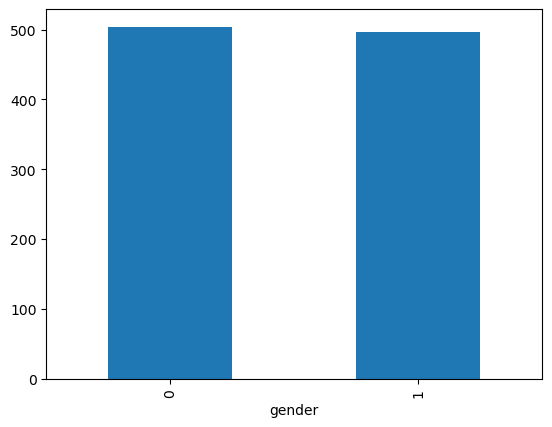

In [56]:
#creates a bar graph based on gender. male= 1 and female=0
df_clean['gender'] = df_clean['gender'].astype('category', copy=False)

df_clean['gender'].value_counts().plot(kind='bar')

In [57]:
# Define mappings for columns with multiple answers
multi_answer_mappings = {
    'family_history': {
        'No': 0,
        'Yes': 1
        
    }
}

# Apply mappings to the DataFrame
for col, mapping in multi_answer_mappings.items():
    df_clean[col] = df_clean[col].map(mapping)




In [58]:
# Define mappings for columns with multiple answers
multi_answer_mappings = {
    'depression_status': {
        'No': 0,
        'Yes': 1
        
    }
}

# Apply mappings to the DataFrame
for col, mapping in multi_answer_mappings.items():
    df_clean[col] = df_clean[col].map(mapping)

In [59]:
# Define mappings for columns with multiple answers
multi_answer_mappings = {
    'medication_history': {
        'No': 0,
        'Yes': 1
        
    }
}

# Apply mappings to the DataFrame
for col, mapping in multi_answer_mappings.items():
    df_clean[col] = df_clean[col].map(mapping)

In [60]:
# Define mappings for columns with multiple answers
multi_answer_mappings = {
    'apoe_ε4': {
        'Negative': 0,
        'Positive': 1
        
    }
}

# Apply mappings to the DataFrame
for col, mapping in multi_answer_mappings.items():
    df_clean[col] = df_clean[col].map(mapping)

In [61]:
# Define mappings for columns with multiple answers
multi_answer_mappings = {
    'sleep_quality': {
        'Poor': 0,
        'Good': 1
        
    }
}

# Apply mappings to the DataFrame
for col, mapping in multi_answer_mappings.items():
    df_clean[col] = df_clean[col].map(mapping)

In [62]:
# Define mappings for columns with multiple answers
multi_answer_mappings = {
    'nutrition_diet': {
        'Low-Carb Diet': 0,
        'Mediterranean Diet': 1,
        'Balanced Diet': 2
        
        
    }
}

# Apply mappings to the DataFrame
for col, mapping in multi_answer_mappings.items():
    df_clean[col] = df_clean[col].map(mapping)

In [63]:
# Define mappings for columns with multiple answers
multi_answer_mappings = {
    'education_level': {
        'No School': 0,
        'Primary School': 1,
        'Secondary School': 2,
        'Diploma/Degree': 3
        
    }
}

# Apply mappings to the DataFrame
for col, mapping in multi_answer_mappings.items():
    df_clean[col] = df_clean[col].map(mapping)


In [64]:
# Define mappings for columns with multiple answers
multi_answer_mappings = {
    'smoking_status': {
        'Never Smoked': 0,
        'Former Smoker': 1,
        'Current Smoker': 2
        
    }
}

# Apply mappings to the DataFrame
for col, mapping in multi_answer_mappings.items():
    df_clean[col] = df_clean[col].map(mapping)


In [65]:
# Define mappings for columns with multiple answers
multi_answer_mappings = {
    'dominant_hand': {
        'Left': 0,
        'Right': 1
        
    }
}

# Apply mappings to the DataFrame
for col, mapping in multi_answer_mappings.items():
    df_clean[col] = df_clean[col].map(mapping)

In [66]:
#shows each unique value 
print(df_clean['physical_activity'].unique())

['Sedentary' 'Moderate Activity' 'Mild Activity']


In [67]:
# Define mappings for columns with multiple answers
multi_answer_mappings = {
    'physical_activity': {
        'Sedentary': 0,
        'Moderate Activity': 1,
        'Mild Activity': 2
        
    }
}

# Apply mappings to the DataFrame
for col, mapping in multi_answer_mappings.items():
    df_clean[col] = df_clean[col].map(mapping)

In [68]:
df_clean

,diabetic,alcohollevel,heartrate,bloodoxygenlevel,bodytemperature,weight,mri_delay,age,education_level,dominant_hand,...,family_history,smoking_status,apoe_ε4,physical_activity,depression_status,cognitive_test_scores,medication_history,nutrition_diet,sleep_quality,dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,60,1,0,...,0,2,0,0,0,10,0,0,0,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,61,2,1,...,0,1,1,1,0,1,1,0,0,1
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,69,1,1,...,1,1,0,1,0,8,0,1,0,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,78,2,0,...,1,0,0,2,1,5,1,2,0,1
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,77,2,1,...,1,0,1,2,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0.081825,87,93.851963,36.495134,50.380106,42.318663,88,3,0,...,1,0,1,2,0,5,0,2,0,1
996,1,0.145249,97,94.522391,36.270804,94.006484,52.812568,80,1,0,...,0,0,0,1,0,9,1,0,0,0
997,1,0.073692,65,98.578388,37.065703,80.088613,13.640229,67,1,1,...,0,0,1,0,0,8,1,2,1,0
998,0,0.037347,71,91.298580,37.037202,95.322210,17.445715,62,0,0,...,1,0,1,0,1,2,0,0,1,1


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pickle

In [70]:
#training the data to look at dementia as one vs everything else
y = df_clean['dementia']
x= df_clean.drop(['dementia'], axis=1)
# x_train, x_test, y_train, y_test for test variables
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [71]:

from sklearn.linear_model import LogisticRegression
# Build and train the logistic regression model
model = LogisticRegression(max_iter=1000)  # setting parameters


In [72]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [73]:
from sklearn.metrics import classification_report
# Evaluate the model
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
#looks like the data might have some overfitting 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       106

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [74]:
# Save the trained model
with open("logistic_regression_model.pkl", "wb") as f:
    pickle.dump(model, f)